# Predicting Melbourne Property Prices
#(Regression,Decision Tree,Random Forest)

In [3]:
# import libararies needed


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [5]:
#Reading in melbourne property data

In [6]:
melbourne = pd.read_csv("melbourne_housing_full.csv")

In [7]:
print(melbourne.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [8]:
melbourne.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [9]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30931 entries, 0 to 30930
Data columns (total 21 columns):
Suburb           30931 non-null object
Address          30931 non-null object
Rooms            30931 non-null int64
Type             30931 non-null object
Price            24197 non-null float64
Method           30931 non-null object
SellerG          30931 non-null object
Date             30931 non-null object
Distance         30930 non-null float64
Postcode         30930 non-null float64
Bedroom2         23868 non-null float64
Bathroom         23862 non-null float64
Car              23497 non-null float64
Landsize         20405 non-null float64
BuildingArea     12397 non-null float64
YearBuilt        14109 non-null float64
CouncilArea      30928 non-null object
Lattitude        24089 non-null float64
Longtitude       24089 non-null float64
Regionname       30928 non-null object
Propertycount    30928 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.0+ M

In [10]:
melbourne['Date'] = pd.to_datetime(melbourne['Date'])

In [11]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30931 entries, 0 to 30930
Data columns (total 21 columns):
Suburb           30931 non-null object
Address          30931 non-null object
Rooms            30931 non-null int64
Type             30931 non-null object
Price            24197 non-null float64
Method           30931 non-null object
SellerG          30931 non-null object
Date             30931 non-null datetime64[ns]
Distance         30930 non-null float64
Postcode         30930 non-null float64
Bedroom2         23868 non-null float64
Bathroom         23862 non-null float64
Car              23497 non-null float64
Landsize         20405 non-null float64
BuildingArea     12397 non-null float64
YearBuilt        14109 non-null float64
CouncilArea      30928 non-null object
Lattitude        24089 non-null float64
Longtitude       24089 non-null float64
Regionname       30928 non-null object
Propertycount    30928 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), obj

In [12]:
#Search fot missing values

In [13]:
melbourne.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6734
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          7063
Bathroom          7069
Car               7434
Landsize         10526
BuildingArea     18534
YearBuilt        16822
CouncilArea          3
Lattitude         6842
Longtitude        6842
Regionname           3
Propertycount        3
dtype: int64

In [14]:
# There are a large number of missing values in the dataset
# delete all the rows containing missing values

In [15]:
melbourne = melbourne.dropna()

In [16]:
# Check values have been deleted

In [17]:

melbourne.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [18]:
melbourne.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,7979.000000,7.979000e+03,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000
mean,3.057150,1.086061e+06,10.851886,3109.223086,3.034215,1.626394,1.661361,514.398546,147.089024,1965.186114,-37.805948,144.991639,7446.293896
std,0.973962,6.778049e+05,6.596890,105.782719,0.975872,0.724468,0.967962,1009.035470,89.315655,37.185952,0.087365,0.114408,4378.056558
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,290.000000
25%,2.000000,6.360000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,193.000000,97.000000,1941.000000,-37.857700,144.922195,4380.000000
50%,3.000000,8.950000e+05,9.800000,3083.000000,3.000000,2.000000,2.000000,460.000000,130.000000,1970.000000,-37.799900,144.997810,6543.000000
75%,4.000000,1.340000e+06,13.800000,3150.000000,4.000000,2.000000,2.000000,651.000000,177.400000,1999.500000,-37.751600,145.061800,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,40469.000000,3112.000000,2018.000000,-37.407200,145.526350,21650.000000


In [19]:
# average number of rooms for  a house is 3 with the largest house having 12
# The largest price obtained was 9 million, a number of large values may skew the data so further insight is needed to decide
# whether median is a more appropriat measure of central tendency
# majority of houses sold where built in 1965 but one from the 12th century
# the minimum value for building area recorded was 0, this may be a data entry error

In [20]:
melbourne['Rooms'].mode()

0    3
dtype: int64

In [21]:
melbourne[melbourne['Price'] == 9.000000e+06]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19583,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,...,1.0,1.0,744.0,117.0,1960.0,Monash City Council,-37.93168,145.16126,South-Eastern Metropolitan,7113.0


In [22]:
melbourne.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.487934,0.285270,0.081100,0.961309,0.622877,0.408494,0.101486,0.602239,-0.011853,0.016505,0.085036,-0.087170
Price,0.487934,1.000000,-0.205657,0.061956,0.472335,0.474953,0.227116,0.064463,0.515870,-0.304945,-0.217723,0.210316,-0.054848
Distance,0.285270,-0.205657,1.000000,0.479290,0.292245,0.119400,0.263213,0.129107,0.138804,0.292179,-0.080343,0.177938,-0.021836
Postcode,0.081100,0.061956,0.479290,1.000000,0.084145,0.104020,0.056963,0.068148,0.073040,0.075288,-0.252083,0.374922,0.046431
Bedroom2,0.961309,0.472335,0.292245,0.084145,1.000000,0.625669,0.412741,0.101259,0.589960,-0.001757,0.020875,0.084487,-0.085901
Bathroom,0.622877,0.474953,0.119400,0.104020,0.625669,1.000000,0.318255,0.079630,0.547868,0.181605,-0.050126,0.109211,-0.056574
Car,0.408494,0.227116,0.263213,0.056963,0.412741,0.318255,1.000000,0.143425,0.325277,0.127355,0.009783,0.042155,-0.033837
Landsize,0.101486,0.064463,0.129107,0.068148,0.101259,0.079630,0.143425,1.000000,0.085985,0.038110,0.031656,0.003822,-0.026395
BuildingArea,0.602239,0.515870,0.138804,0.073040,0.589960,0.547868,0.325277,0.085985,1.000000,0.046333,-0.039581,0.099905,-0.063779
YearBuilt,-0.011853,-0.304945,0.292179,0.075288,-0.001757,0.181605,0.127355,0.038110,0.046333,1.000000,0.085734,-0.016723,0.011209


In [23]:
#View the correlation between variables,to give indication of what features to use in the model
#heatmap also displays pearson correlation

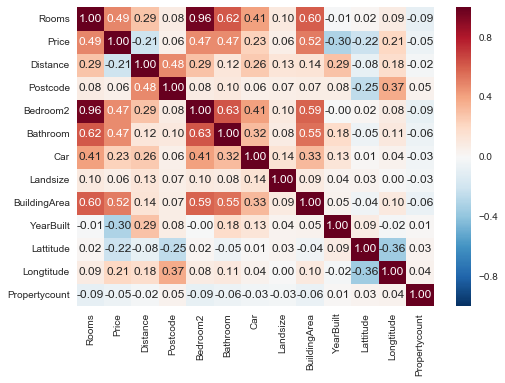

In [24]:
sns.heatmap(melbourne.corr(), annot=True, fmt=".2f")
plt.show()

In [25]:
print(melbourne.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [26]:
#Numeric and categorical variables in the Dataset

In [27]:
melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


# Exploring the categorical variacbles using boxplots

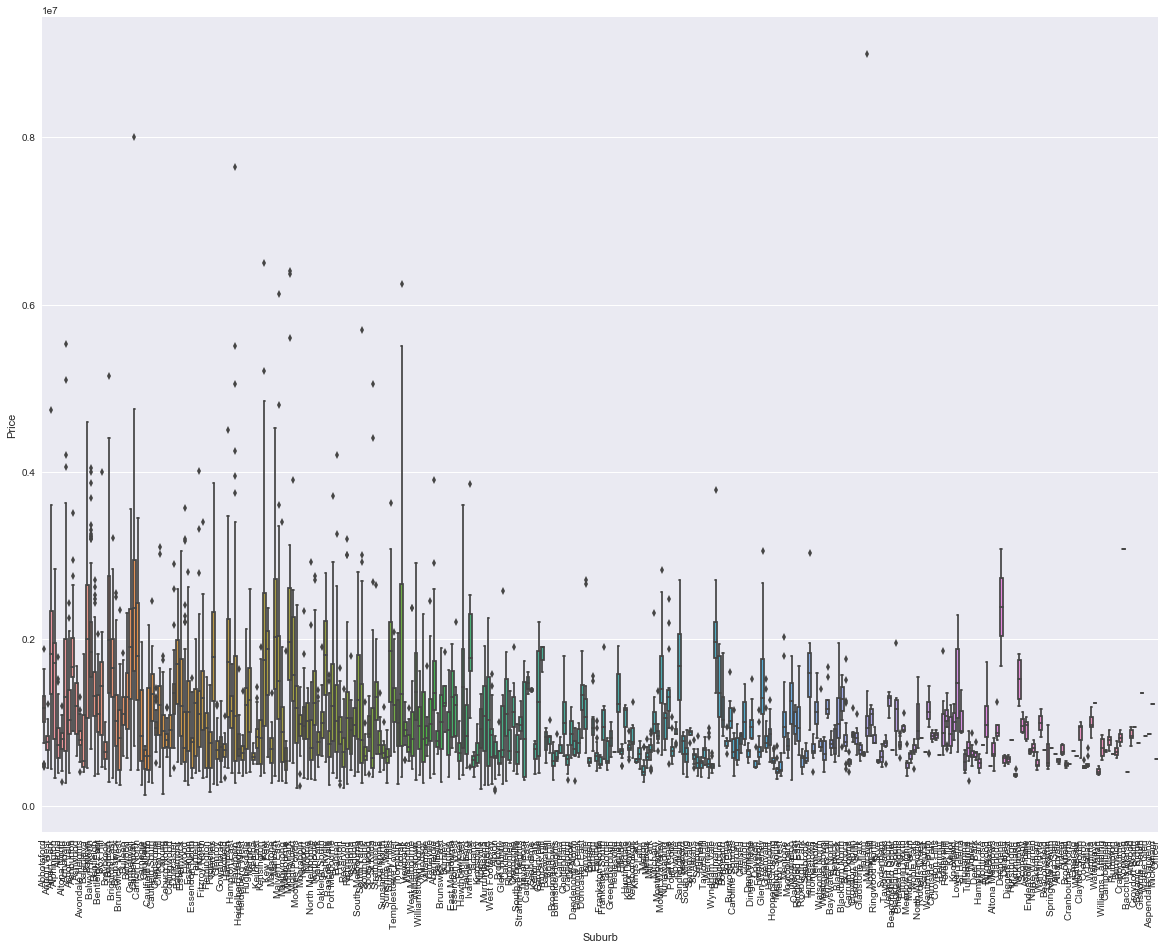

In [28]:
plt.subplots(figsize=(20,15))
sns.boxplot(data = melbourne, x = 'Suburb', y = 'Price')
plt.xticks(rotation=90)
plt.show()

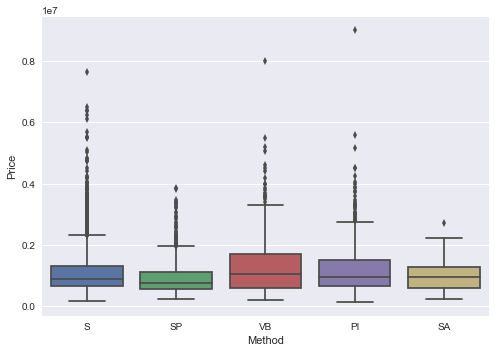

In [29]:
sns.boxplot(data = melbourne, x = 'Method', y = 'Price')
plt.show()

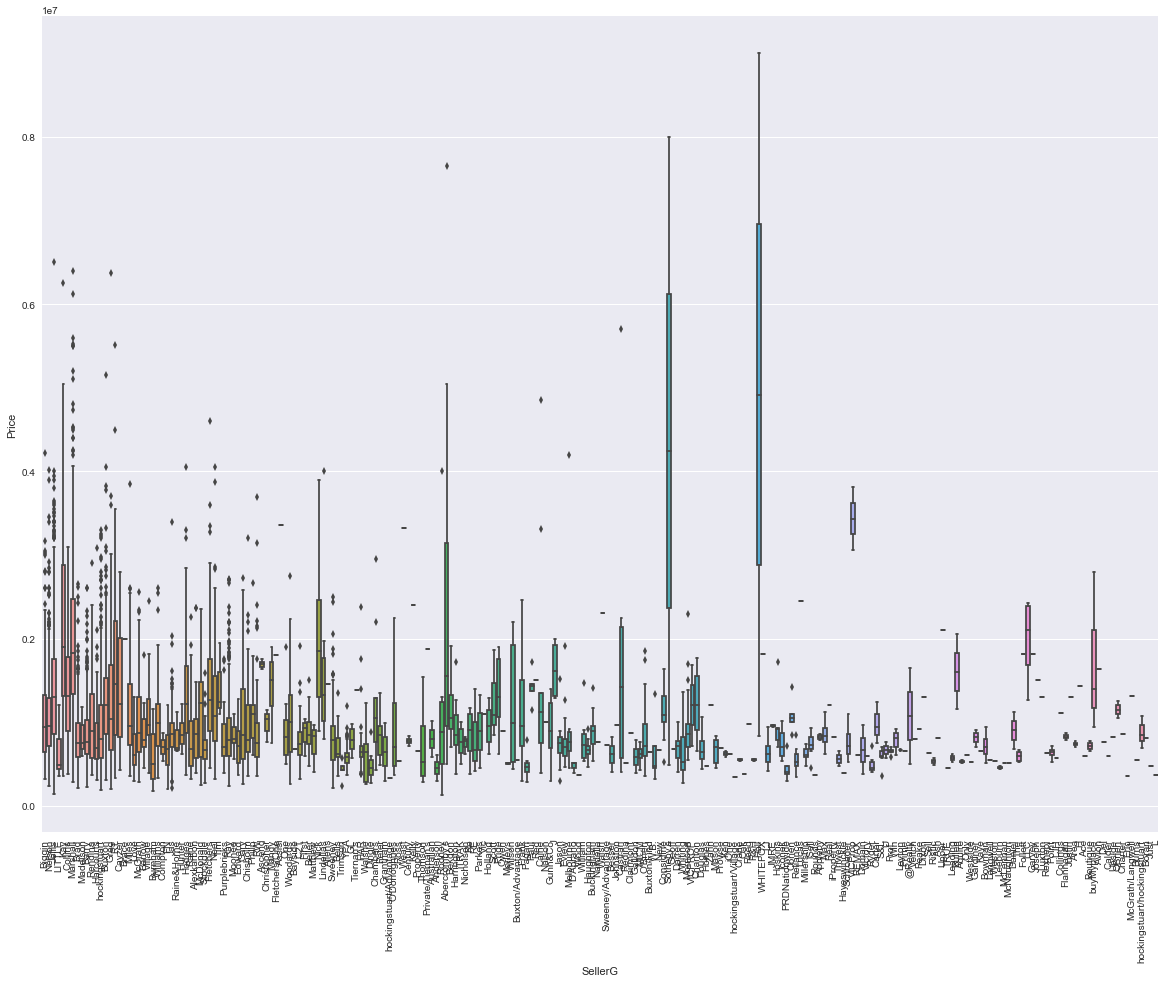

In [30]:
plt.subplots(figsize=(20,15))
sns.boxplot(data = melbourne, x = 'SellerG', y = 'Price')
plt.xticks(rotation=90)
plt.show()





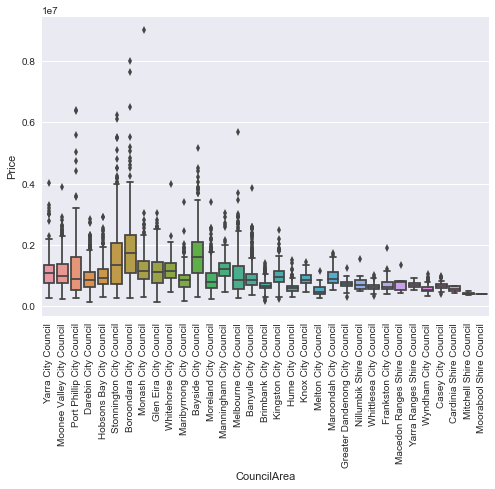

In [31]:
sns.boxplot(data = melbourne, x = 'CouncilArea', y = 'Price')
plt.xticks(rotation=90)
plt.show()




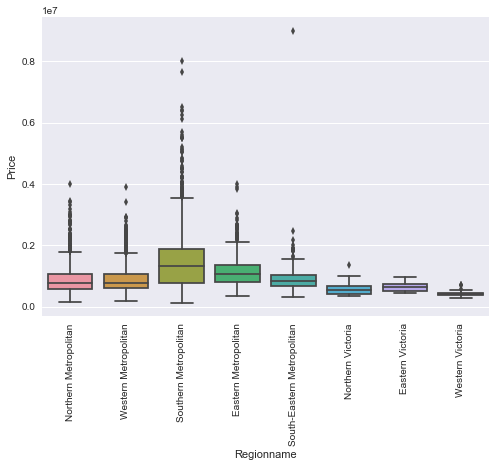

In [32]:
sns.boxplot(data = melbourne, x = 'Regionname', y = 'Price')
plt.xticks(rotation=90)
plt.show()

# Exploing numeric data using scatter matrix

In [33]:
new_melbourne =['Price','Distance','Bathroom','Propertycount','BuildingArea','Rooms','YearBuilt','Bedroom2','Car']
melbourne1 = (melbourne[new_melbourne])

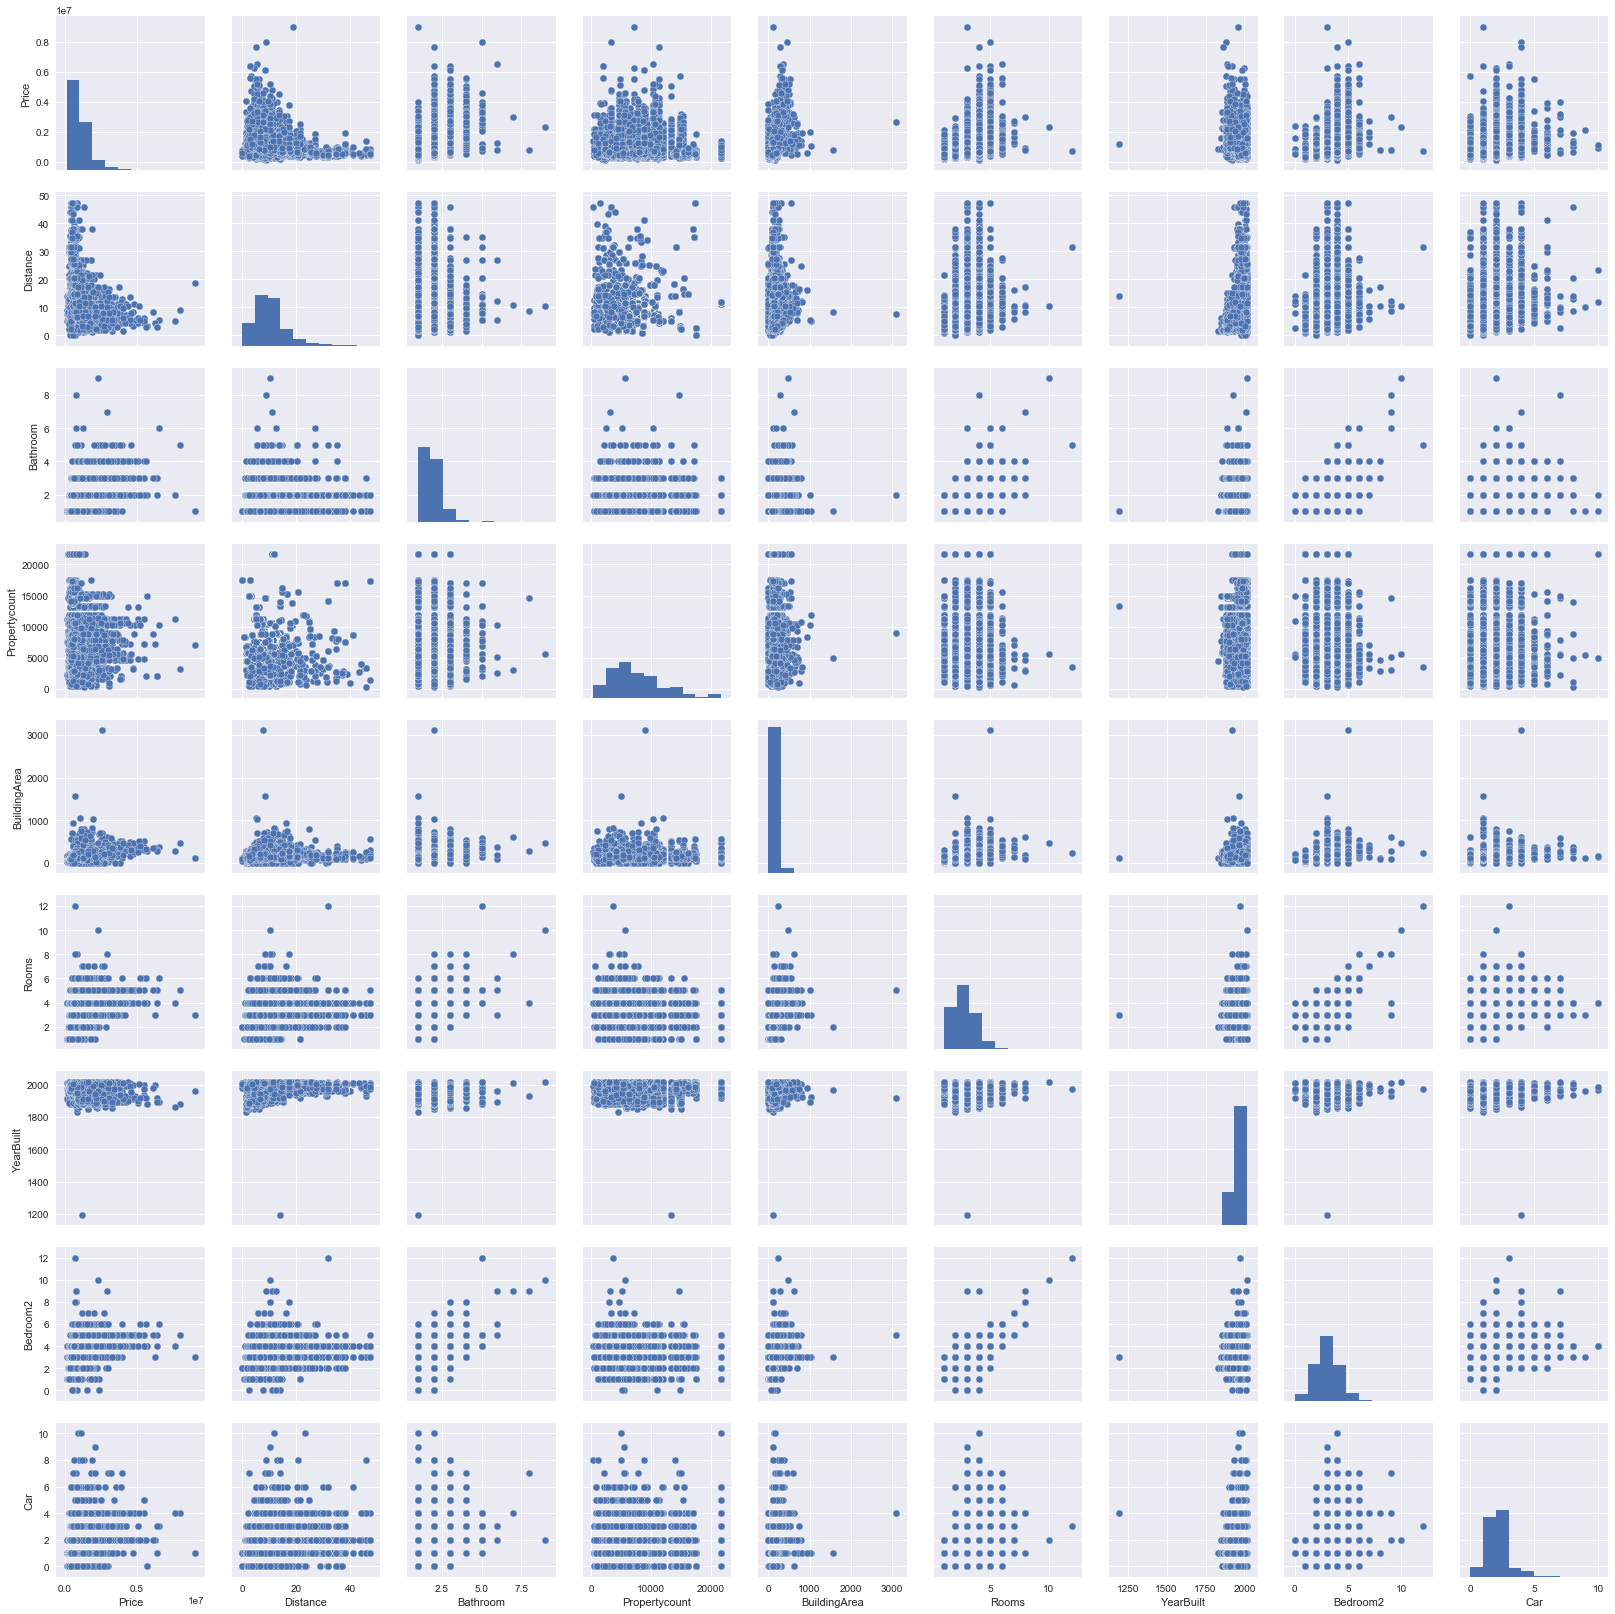

In [34]:
sns.pairplot(melbourne1)
plt.show()

In [36]:
# The data is showing the strongest correlation between price and the number of rooms
# Building Area has also got the strongest correlation with Price


In [51]:
# their does not appear to be a strong linear relationship between price and other variables

In [52]:
#Taking a loolk at price closer we see that the boxplot we see that there are some outliers in the Price variable

In [126]:
print('Mean price paid = £ %d' % np.mean(melbourne['Price']))
print('Median price paid = £ %d' % np.median(melbourne['Price']))

Mean price paid = £ 1086061
Median price paid = £ 895000


In [53]:
# becauce the price data contains large outliers there is a large difference between the mean and median
# we will use median as a measure of central tendency

# Data visualisation

In [55]:
melbourne['Suburb'].value_counts().head(20).plot.bar()

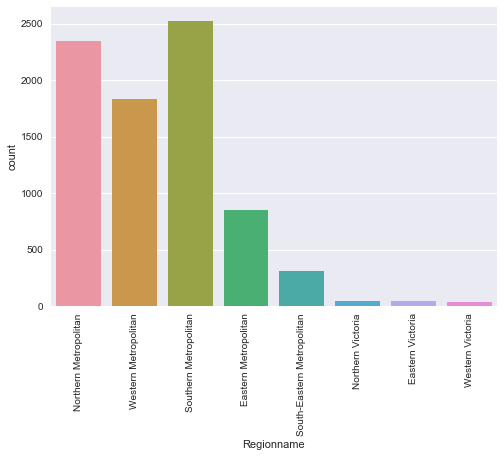

In [127]:
sns.countplot(melbourne['Regionname'])
plt.xticks(rotation=90)
plt.show()

In [123]:
import seaborn as sns

In [121]:
melb =['Date','Price']
melbtime = melbourne[melb]
melbtime2 = melbtime.set_index('Date').resample('M')["Price"].median()

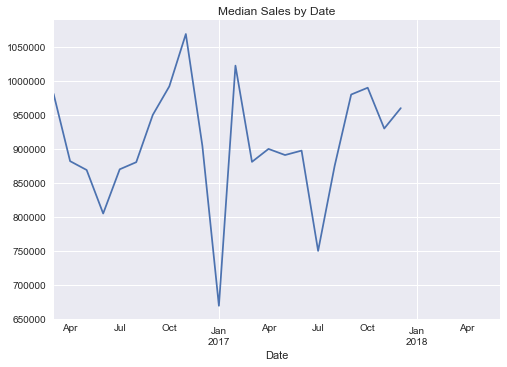

In [122]:
melbtime2.plot()
plt.title("Median Sales by Date")

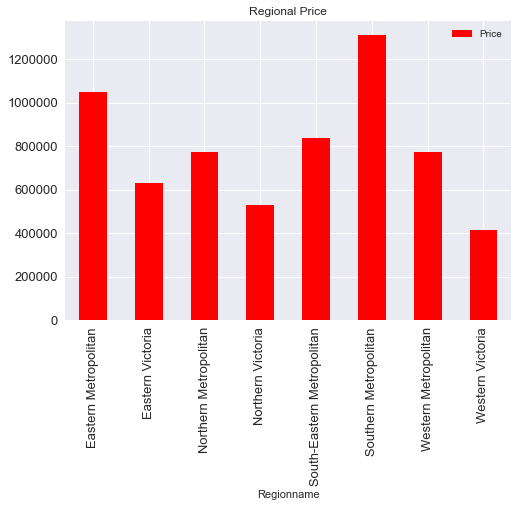

In [58]:
Region_avg_price = melbourne.groupby(['Regionname']).median()[['Price']]
Region_avg_price.plot(kind='bar',color='Red',title='Regional Price',fontsize='13')
plt.show()


In [59]:
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

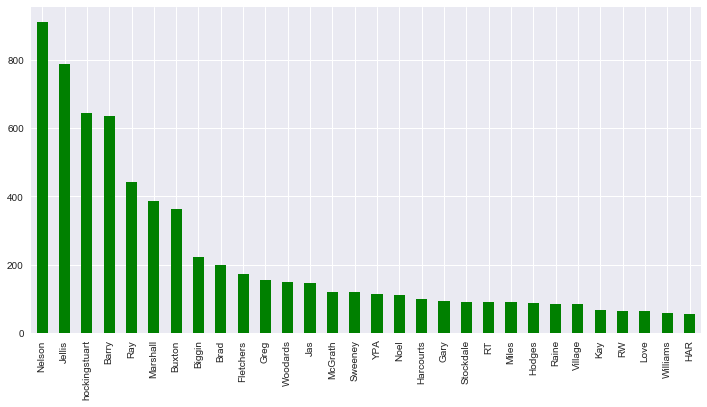

In [60]:
melbourne['SellerG'].value_counts().head(30).plot.bar(figsize=(12,6),color='Green')

In [61]:
melbourne.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


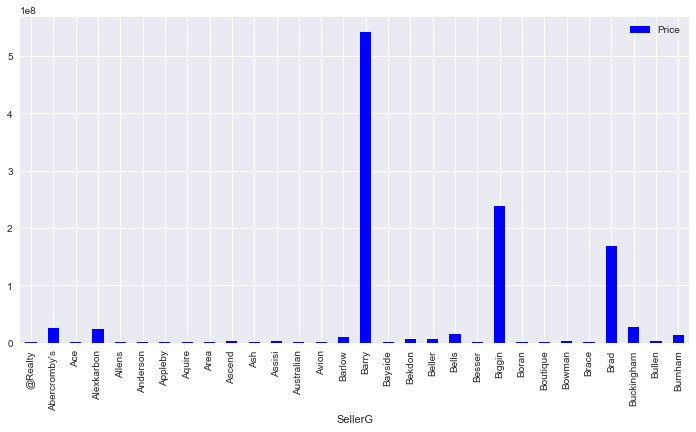

In [62]:
rep1 = ['Price','SellerG']
rep = melbourne[rep1]
rep_plot = rep.groupby("SellerG").sum().head(30).plot.bar(figsize=(12,6),color="Blue")
plt.show()


In [63]:
melbourne.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Regression modelling

In [64]:
new_melbourne =['BuildingArea','Rooms','Landsize','Distance','Bathroom','Propertycount']


In [65]:
x =(melbourne[new_melbourne])

In [66]:
print(x.head(5))

    BuildingArea  Rooms  Landsize  Distance  Bathroom  Propertycount
2           79.0      2     156.0       2.5       1.0         4019.0
4          150.0      3     134.0       2.5       2.0         4019.0
6          142.0      4     120.0       2.5       1.0         4019.0
11         210.0      3     245.0       2.5       2.0         4019.0
14         107.0      2     256.0       2.5       1.0         4019.0


In [67]:
y = melbourne.Price

In [68]:
y.head()

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

In [69]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.cross_validation 

In [70]:
melbourne_model2 = LinearRegression()

In [71]:
x_train, x_test, y_train,y_test = sklearn.cross_validation.train_test_split(x, y, test_size = 0.33, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5345, 6)
(2634, 6)
(5345,)
(2634,)


In [72]:
melbourne_model2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
y_predictions = melbourne_model2.predict(x.head())
print(y_predictions)

Making predictions for the following 5 houses:
    BuildingArea  Rooms  Landsize  Distance  Bathroom  Propertycount
2           79.0      2     156.0       2.5       1.0         4019.0
4          150.0      3     134.0       2.5       2.0         4019.0
6          142.0      4     120.0       2.5       1.0         4019.0
11         210.0      3     245.0       2.5       2.0         4019.0
14         107.0      2     256.0       2.5       1.0         4019.0
The predictions are
[  928291.32171426  1428013.08386688  1494592.16509296  1544901.68046547
   984172.08535408]


In [79]:
y_predicts = melbourne_model2.predict(x_test)

In [85]:
#accuracy of model
#MSE evaluates how much model is out by
mse = sklearn.metrics.mean_squared_error(y_test, y_predicts)
print(mse)

251083580851.0


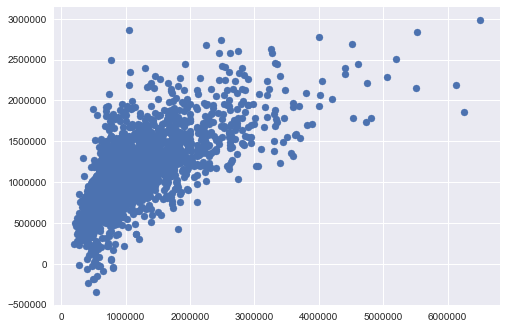

In [80]:
plt.scatter(y_test, y_predicts)
plt.show()
# If the model was a gdd predictor dots would be around the same point

In [81]:
# R-squared explains how much the predictors explain variation in the respose variables

In [83]:
from sklearn import metrics
print('R^2 =',metrics.explained_variance_score(y_test,y_predicts))

R^2 = 0.482836157802


In [ ]:
# just under 50% of variation in y is explained by the model

# Decison tree model

In [86]:
from sklearn.tree import DecisionTreeRegressor


In [87]:
melbourne_model = DecisionTreeRegressor()

In [92]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y,random_state = 0)

In [100]:
melbourne_model.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [107]:
val_predictions = melbourne_model.predict(val_x)

In [113]:
print("Making predictions for the following 5 houses:")
print(val_x.head())
print("The predictions are")
print(melbourne_model.predict(val_x.head()))
print("Actual values are")
print(val_y.head())

Making predictions for the following 5 houses:
       BuildingArea  Rooms  Landsize  Distance  Bathroom  Propertycount
6375          135.0      3     216.0      11.2       2.0         8801.0
1645          108.0      3     384.0      13.1       1.0         4605.0
20309         163.0      3     697.0      10.4       2.0         3464.0
17123         149.0      4     587.0      29.8       2.0         4718.0
5729          154.0      3     716.0      12.8       2.0         5629.0
The predictions are
[ 1120000.   840000.   870000.   426000.   520000.]
Actual values are
6375     1253000.0
1645      948000.0
20309    1000001.0
17123     347500.0
5729      695000.0
Name: Price, dtype: float64


In [114]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y, val_predictions))

304363.635589


# Random Forest model

In [116]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(train_x, train_y)
melb_preds = forest_model.predict(val_x)


In [117]:
print("Making predictions for the following 5 houses:")
print(val_x.head())
print("The predictions are")
print(forest_model.predict(val_x.head()))
print("Actual values are")
print(val_y.head())

Making predictions for the following 5 houses:
       BuildingArea  Rooms  Landsize  Distance  Bathroom  Propertycount
6375          135.0      3     216.0      11.2       2.0         8801.0
1645          108.0      3     384.0      13.1       1.0         4605.0
20309         163.0      3     697.0      10.4       2.0         3464.0
17123         149.0      4     587.0      29.8       2.0         4718.0
5729          154.0      3     716.0      12.8       2.0         5629.0
The predictions are
[ 1008500.   692200.  1076750.   450050.  1004100.]
Actual values are
6375     1253000.0
1645      948000.0
20309    1000001.0
17123     347500.0
5729      695000.0
Name: Price, dtype: float64


In [118]:
print(mean_absolute_error(val_y, melb_preds))

231914.218415


# The random forest gives us a lower mean_absolute_error and is a better model for predicting prices